Họ tên : Hoàng Tiến Anh 

MSSV : 21068521

# ĐỀ KIỂM TRA THỰC HÀNH 2 
## Môn: Tối ưu hoá cho Khoa học dữ liệu
## Ngày: 18/11/2023
## Lớp: DHKHDL17A. Thời gian: 45 phút

Cho ma trận $A=\begin{bmatrix}1 & 0\\ 0 & 3 \end{bmatrix}$ và vector $b=(-1;2)$. Xét bài toán tối ưu sau 
$$\min_{x\in\mathbb{R}^2}f(x)=\dfrac{1}{2}x^TAx-b^Tx.$$

1. (4 điểm) Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán trên.


2. (4 điểm) Sử dụng thuật toán Gradient Descent, với giá trị $x$ ban đầu là $x^{(0)}=(1;0)$, sử dụng learning rate là $1$ và thực hiện tối đa $20$ vòng lặp. In ra giá trị của $x^{(k)}$ và $f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$. Từ đó vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-f(p^*)|$.


3. (2 điểm) Tìm learning rate theo phương pháp exact-line search trong thuật toán Gradient Descent của bài toán trên với điểm khởi tạo là $x^{(0)}=(1;0)$. Gọi điểm cập nhật trong trường hợp này là $x^{(k)}_{\text{exact}}$, vẽ đồ thị mô tả cho sai số $|f(x^{(k)}_{\text{exact}})-f(p^*)|$.  


$ \nabla f(x)=\dfrac{1}{2}x^TAx-b^Tx = Ax - b $  ( theo phương trình hàm toàn phương )

Để tìm điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ thì ta cần tính $Ax-b = 0 $

In [10]:
A = np.array([[1,0],[0,3]])
b = np.array([-1,2])

x = np.linalg.solve(A,b)
f_star = 1/2*x.T@A@x-b.T@x
x,f_star

(array([-1.        ,  0.66666667]), -1.1666666666666665)

Vậy điểm tối ưu của bài toán : $\displaystyle x^* = (-1,\frac{2}{3})$ , giá trị tối ưu của bài toán là $p^* = \frac{-7}{6}$

iter 1 x= [-1  2]   ,  f(x)= 1.5
iter 2 x= [-1 -2]   ,  f(x)= 9.5
iter 3 x= [-1  6]   ,  f(x)= 41.5
iter 4 x= [ -1 -10]   ,  f(x)= 169.5
iter 5 x= [-1 22]   ,  f(x)= 681.5
iter 6 x= [ -1 -42]   ,  f(x)= 2729.5
iter 7 x= [-1 86]   ,  f(x)= 10921.5
iter 8 x= [  -1 -170]   ,  f(x)= 43689.5
iter 9 x= [ -1 342]   ,  f(x)= 174761.5
iter 10 x= [  -1 -682]   ,  f(x)= 699049.5
iter 11 x= [  -1 1366]   ,  f(x)= 2796201.5
iter 12 x= [   -1 -2730]   ,  f(x)= 11184809.5
iter 13 x= [  -1 5462]   ,  f(x)= 44739241.5
iter 14 x= [    -1 -10922]   ,  f(x)= 178956969.5
iter 15 x= [   -1 21846]   ,  f(x)= 715827881.5
iter 16 x= [    -1 -43690]   ,  f(x)= 2863311529.5
iter 17 x= [   -1 87382]   ,  f(x)= 11453246121.5
iter 18 x= [     -1 -174762]   ,  f(x)= 45812984489.5
iter 19 x= [    -1 349526]   ,  f(x)= 183251937961.5
iter 20 x= [     -1 -699050]   ,  f(x)= 733007751849.5
[     -1 -699050]


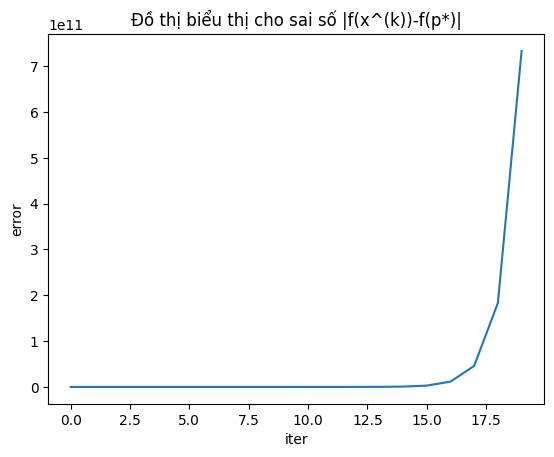

In [11]:
import numpy as np
A = np.array([[1, 0], [0, 3]])
b = np.array([-1, 2])
f_star = -7/6
def f(x):
    return 1/2*x.T@A@x-b.T@x

def grad(x):
    return A@x-b

def gd(x,lr,max_iter):
    for i in range(max_iter):
        x = x-lr*grad(x)
        list_x.append(x)
        print('iter',i+1,'x=',x,'  ,  f(x)=',f(x))
        if np.linalg.norm(grad(x))<1e-3:
            break
    return x

#Khởi tạo vector x
x = np.array([1,0])
iter = 20
lr = 1
list_x = []
x = gd(x,lr,iter)
print(x)
#Vẽ đồ thị biểu thị cho sai số |f(x^(k))-f(p*)|
import matplotlib.pyplot as plt
x = range(len(list_x))
plt.plot(x,[abs(f(i)-f_star) for i in list_x])
plt.xlabel('iter')
plt.ylabel('error')
plt.title('Đồ thị biểu thị cho sai số |f(x^(k))-f(p*)|')
plt.show()



3. (2 điểm) Tìm learning rate theo phương pháp exact-line search trong thuật toán Gradient Descent của bài toán trên với điểm khởi tạo là $x^{(0)}=(1;0)$. Gọi điểm cập nhật trong trường hợp này là $x^{(k)}_{\text{exact}}$, vẽ đồ thị mô tả cho sai số $|f(x^{(k)}_{\text{exact}})-f(p^*)|$.  


Công thức cho điểm cập nhật $x^{(k)}$ như sau : 

\begin{align}
x^{(k)} = x^{(k-1)} - t \nabla f(x^{(k-1)})
\end{align}

Trong đó, $t_k$ là learning rate. Để tính $t_k$ dựa trên exact line search, ta cần giải bài toán tối ưu 1 chiều sau:
$$\begin{align}
t = \arg\min_{s}  f(x^{(k)} - s \nabla f(x^{(k)}))\\
t = \arg\min_{s}  f(x^{(k)} - s * (Ax-b))
\end{align}$$



$$\displaystyle \begin{align*}
x^{(k)} &=x^{(k-1)} - t . \nabla f_{x^{(k-1)}}\\
&=(x_1^{(k-1)},x_2^{(k-1)}) - \frac{1}{3}(x_1^{(k-1)},x_2^{(k-1)}+3) \\
&= (\frac{2}{3}x_1^{(k-1)},\frac{2}{3}x_2^{(k-1)}-1) \\ 
\end{align*}$$



$$\displaystyle \begin{align*}
x_1^{(k)} = \frac{2}{3}x_1^{(k-1)} = (\frac{2}{3})^2x_1^{(k-2)} = \dots = (\frac{2}{3})^k x_1^{(0)} = (\frac{2}{3})^k

\end{align*}$$

$$\displaystyle \begin{align*}
x_2^{(k)} = \frac{2}{3}x_2^{(k-1)}-1 = (\frac{2}{3})^2x_2^{(k-2)}-1 = \dots = (\frac{2}{3})^k x_2^{(0)} -1= -1
\end{align*}$$

Vậy $$\displaystyle x^{(k)} = \left((\frac{2}{3})^k, -1 \right)$$

In [19]:
from sympy import symbols, diff, Matrix, solve, latex
from IPython.display import display, Markdown
# Khai báo các biến
x1, x2 = symbols('x1 x2')

# Ma trận A và vector b
A = Matrix([[1, 0], [0, 3]])
b = Matrix([-1, 2])

# Hàm số f(x) = 1/2 * x^T * A * x - b^T * x
f = 1/2 * Matrix([x1, x2]).T * A * Matrix([x1, x2]) - b.T * Matrix([x1, x2])

# Tính đạo hàm của f theo từng biến
df_x1 = diff(f, x1)
df_x2 = diff(f, x2)

display(Markdown(f"Đạo hàm : ${latex(df_x1)}$"))
display(Markdown(f"Đạo hàm : ${latex(df_x2)}$"))

# Giải hệ phương trình đạo hàm bằng 0
sol = solve([df_x1, df_x2], [x1, x2])
sol, f.subs({x1: sol[x1], x2: sol[x2]})

Đạo hàm : $\left[\begin{matrix}1.0 x_{1} + 1\end{matrix}\right]$

Đạo hàm : $\left[\begin{matrix}3.0 x_{2} - 2\end{matrix}\right]$

({x1: -1.00000000000000, x2: 0.666666666666667}, Matrix([[-1.16666666666667]]))

In [18]:
s = symbols('s')
tk = Matrix([[x1],[x2]]) - s*Matrix([df_x1, df_x2])
tk

Matrix([
[-s*(1.0*x1 + 1) + x1],
[-s*(3.0*x2 - 2) + x2]])

In [17]:
nghiem_s = solve(diff(f.subs({x1: tk[0], x2:tk[1]}),s))
nghiem_s[0]

{s: (x1**2 + 2.0*x1 + 9.0*x2**2 - 12.0*x2 + 5.0)/(x1**2 + 2.0*x1 + 27.0*x2**2 - 36.0*x2 + 13.0)}

In [16]:
nabla = '\u2207'
display(Markdown(f" Điểm s để f(x-s.{nabla}.f(x)) nhỏ nhất là : $\displaystyle {latex(nghiem_s[0][s])}$"))


 Điểm s để f(x-s.∇.f(x)) nhỏ nhất là : $\displaystyle \frac{x_{1}^{2} + 2.0 x_{1} + 9.0 x_{2}^{2} - 12.0 x_{2} + 5.0}{x_{1}^{2} + 2.0 x_{1} + 27.0 x_{2}^{2} - 36.0 x_{2} + 13.0}$

In [14]:
nghiem_s[0][s].subs({x1 : 1 , x2: 0})

0.500000000000000

In [20]:
(f.subs({x1: tk[0], x2:tk[1]})).subs(*nghiem_s)

Matrix([[x1 - 2*x2 - (1.0*x1 + 1)*(x1**2 + 2.0*x1 + 9.0*x2**2 - 12.0*x2 + 5.0)/(x1**2 + 2.0*x1 + 27.0*x2**2 - 36.0*x2 + 13.0) + 0.5*(x1 - (1.0*x1 + 1)*(x1**2 + 2.0*x1 + 9.0*x2**2 - 12.0*x2 + 5.0)/(x1**2 + 2.0*x1 + 27.0*x2**2 - 36.0*x2 + 13.0))**2 + 1.5*(x2 - (3.0*x2 - 2)*(x1**2 + 2.0*x1 + 9.0*x2**2 - 12.0*x2 + 5.0)/(x1**2 + 2.0*x1 + 27.0*x2**2 - 36.0*x2 + 13.0))**2 + 2*(3.0*x2 - 2)*(x1**2 + 2.0*x1 + 9.0*x2**2 - 12.0*x2 + 5.0)/(x1**2 + 2.0*x1 + 27.0*x2**2 - 36.0*x2 + 13.0)]])

In [21]:
t = nghiem_s[0][s].subs({x1:1,x2:0})
t

0.500000000000000

$$\begin{align}

\end{align}$$

## --------------------------------------- Hết --------------------------------------

### Lưu ý: sinh viên không được sử dụng internet. Giám thị không giải thích gì thêm.